# **Assignment 1**

Aurélia Haas - *260787990*

---



## **1 - Threshold**




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


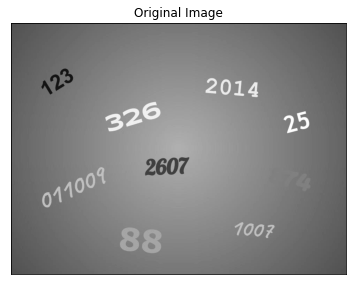

In [57]:
# Initial setup
import matplotlib.pyplot as plot
import numpy as np
import cv2

from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

path = '/content/drive/My Drive/Colab Notebooks/ECSE 415/Assignment 1/images/'

# Read the 'numbers.jpg' image and convert it to grayscale
numbers_image = cv2.imread(path + 'numbers.jpg', cv2.IMREAD_GRAYSCALE)

plot.figure(figsize = (6, 6)) 

plot.imshow(numbers_image, cmap = 'gray')
plot.title("Original Image")
plot.xticks([])
plot.yticks([])
plot.show()

# white pixel value
white_pixel = 255

### Question 1.1


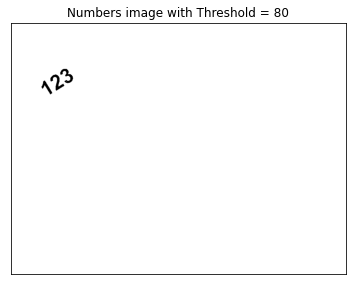

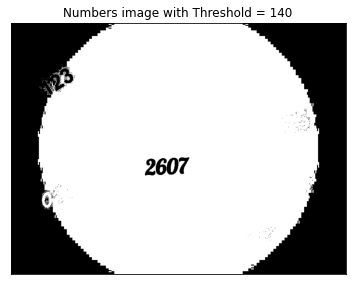

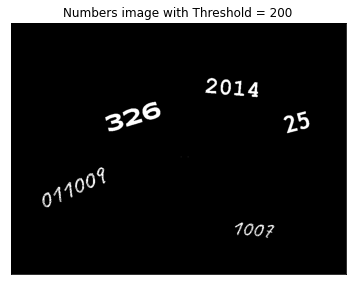

In [58]:
thresholds = [80, 140, 200]

# The for loop here is only because we want to display 3 images with 3 different thresholds
for threshold in thresholds:
  # We create an array of zeros with the same shape and type as the array numbers_image
  # We compare all the pixels of the numbers_image array and if they are bigger than the threshold, we set a white pixel in the new array
  thresholded_numbers_image = np.zeros_like(numbers_image) 
  thresholded_numbers_image[numbers_image > threshold] = white_pixel
  
  # Plot images
  plot.figure(figsize = (6, 6)) 

  plot.imshow(thresholded_numbers_image, cmap = 'gray')
  plot.title("Numbers image with Threshold = {}" .format(threshold))
  plot.xticks([])
  plot.yticks([])
  plot.show()

###Question 1.2

The pixel range is [0, 255], with a black pixel valued at 0 and a white pixel valued at 255. The 3 thresholds used above belong into that range. We notice that as we increase the threshold value, we filter the numbers; numbers with pixel values below the threshold will be set to a black, while the ones above the threshold will be set to a white pixel. Increasing the threshold, will turn less and less pixels into a white pixel that is why we can observe for a low (respectively high) threshold a white (respectively black) background and the darkest (respectively lighter) numbers visible. In the case of an average threshold, such as 140, we can observe a black background and a white centered circle. This is to be expected because the middle of the original black and white picture is much lighter in the center than around the edges and we attain the boundary between a full black or full white background.
We can observe:
1. With a threshold of 80, almost the whole image is set to 255 (white pixel). Only 1 number, the darkest one is segmented:'123'.
2. With a threshold of 140, the gradient background is split into a black background with a white circle. This allows numbers with pixel values lower than the threshold to be seen in the black background and on the contrary, numbers with pixel values higher than the threshold to be seen in the white circle. The 2 segmented numbers are: '123' and '2607'. However, '123' can be visualized as not entirely segmented, but I personnaly am able to see the number that is why it was aforementioned. 
3. With a threshold of 200, almost the whole image is set to 0 (black pixel). Therefore, 5 numbers, the brighter ones are segmented: '25', '326', '2014', '1007', '011009'.

###Question 1.3

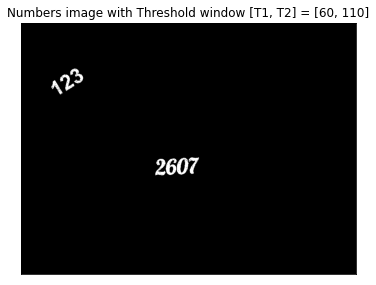

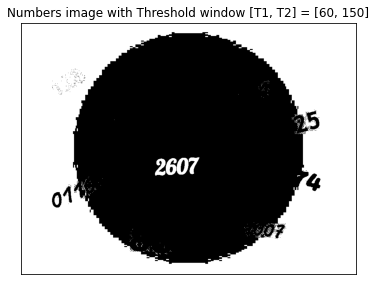

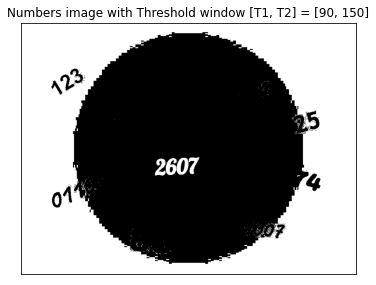

In [59]:
threshold_windows = [[60, 110], [60, 150], [90, 150]]

# The for loop here is only because we want to display 3 images with 3 different threshold windows
for threshold_window in threshold_windows:
  # We create an array of zeros with the same shape and type as the array numbers_image
  # We check if each pixel of the numbers_image belongs inside the threshold or not. If so, in the new array, we generate a white pixel at this position, otherwise a black pixel
  window_thresholded_numbers_image = np.zeros_like(numbers_image)
  window_thresholded_numbers_image[np.logical_or(numbers_image <= threshold_window[0], numbers_image >= threshold_window[1])] = black_pixel
  window_thresholded_numbers_image[np.logical_and(numbers_image > threshold_window[0], numbers_image < threshold_window[1])] = white_pixel

  # Plot images
  plot.figure(figsize = (6, 6)) 
  plot.imshow(window_thresholded_numbers_image, cmap = 'gray')
  plot.title("Numbers image with Threshold window [T1, T2] = [{}, {}]" .format(threshold_window[0], threshold_window[1]))
  plot.xticks([])
  plot.yticks([])
  plot.show()

The window binary thresholding algorithm works by puting white pixels for the pixel values that belongs to the defined threshold window [T1, T2] and black pixels otherwise. The same phenomena occurs with a white background and a black circle appearing on the image following certain threshold windows.
We can observe:
1. With a window threshold of [60, 110], the 2 segmented numbers are: '123' and '2607'.
2. With a window threshold of [60, 150], the 3 segmented numbers are: '25', '74' and '2607'. However, '25', and '74' can be visualized as not entirely segmented, but I personnaly am able to see the numbers that is why it was aforementioned. 
3. With a window threshold of [90, 150], the 4 segmented numbers are: '25', '74', '123' and '2607'. However, '25', and '74' can be visualized as not entirely segmented, but I personnaly am able to see the numbers that is why it was aforementioned. 

###Question 1.4

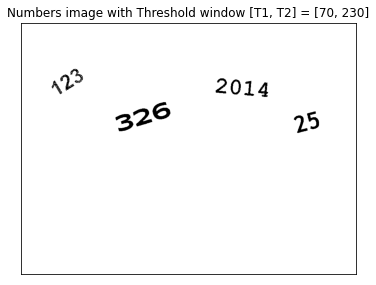

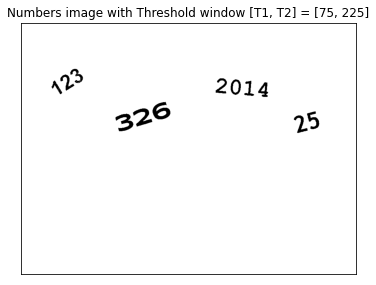

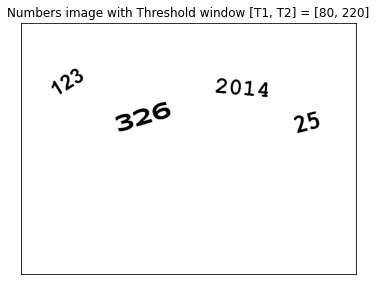

In [60]:
threshold_windows = [[70, 230], [75, 225], [80, 220]]

# The for loop here is only because we want to display 3 images with 3 different threshold windows
# We check if each pixel of the numbers_image belongs inside the threshold or not. If so, in the new array, we generate a white pixel at this position, otherwise a black pixel
for threshold_window in threshold_windows:
  window_thresholded_numbers_image = np.zeros_like(numbers_image)
  window_thresholded_numbers_image[np.logical_or(numbers_image <= threshold_window[0], numbers_image >= threshold_window[1])] = black_pixel
  window_thresholded_numbers_image[np.logical_and(numbers_image > threshold_window[0], numbers_image < threshold_window[1])] = white_pixel

  # Plot images
  plot.figure(figsize = (6, 6)) 
  plot.imshow(window_thresholded_numbers_image, cmap = 'gray')
  plot.title("Numbers image with Threshold window [T1, T2] = [{}, {}]" .format(threshold_window[0], threshold_window[1]))
  plot.xticks([])
  plot.yticks([])
  plot.show()

We do the exact same thing as in question 1.3, we just modify the values of the threshold windows.
The first threshold was chosen by groping on to plot a similar image as figure 1(b). I picked [70, 230]. The two other threshold windows were chosen by adding a value of 5 on the left side and removing a value of 5 on the right side in order to narrow the threshold windows.


---
## **2 - Denoising**

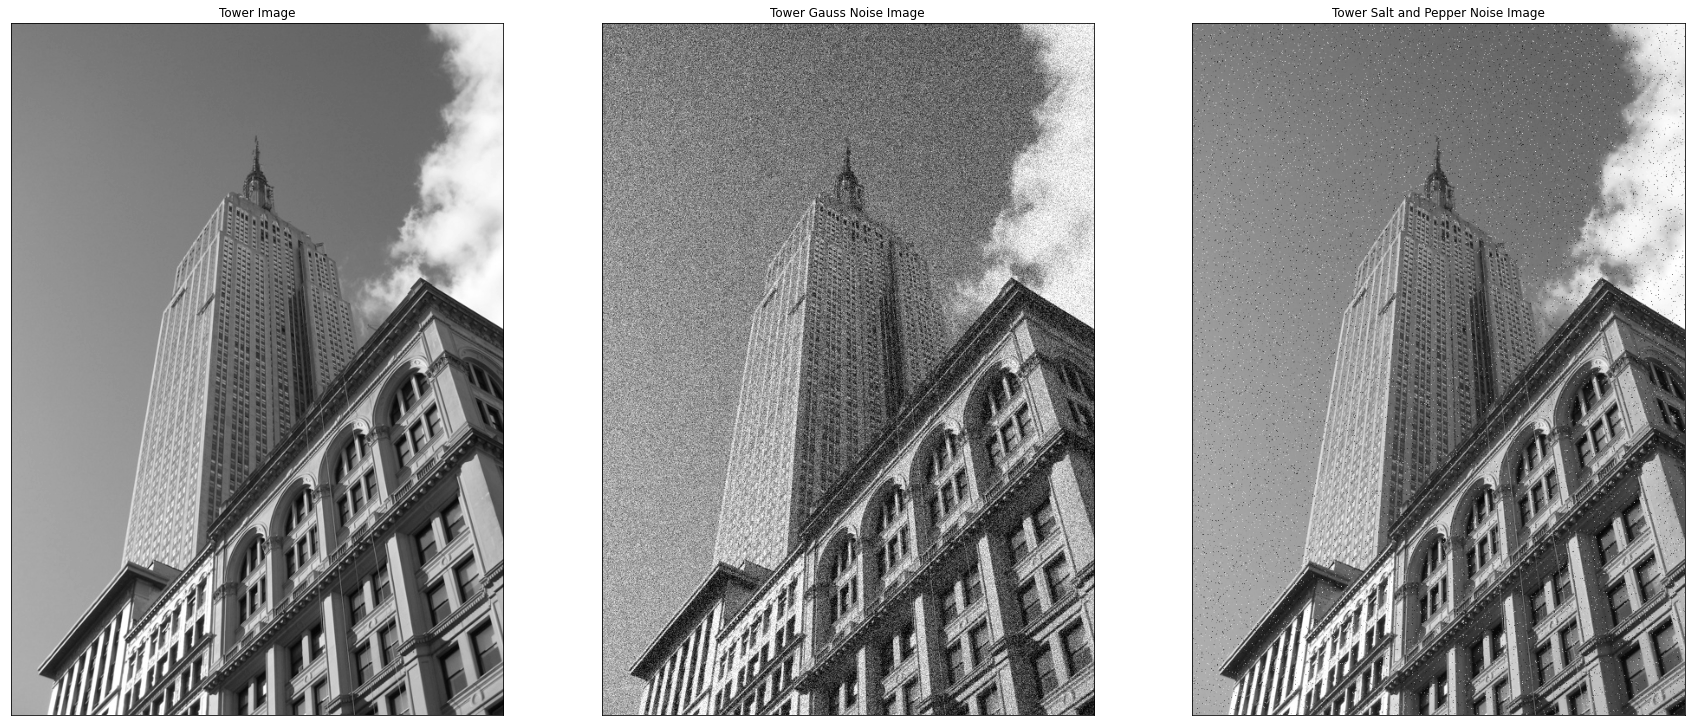

In [61]:
# Initial setup
import math

# Read the 'Tower.png', 'Tower_Gauss_Noise.png' and 'Tower_Salt_and_Pepper_Noise.png' images and convert them to grayscale
tower_image = cv2.imread(path + 'Tower.png', cv2.IMREAD_GRAYSCALE)
tower_gauss_noise_image = cv2.imread(path + 'Tower_Gauss_Noise.png', cv2.IMREAD_GRAYSCALE)
tower_salt_and_pepper_noise_image = cv2.imread(path + 'Tower_Salt_and_Pepper_Noise.png', cv2.IMREAD_GRAYSCALE)

# Plot the 3 images
plot.figure(figsize = (30, 30)) 

plot.subplot(131)
plot.imshow(tower_image, cmap = 'gray')
plot.title("Tower Image")
plot.xticks([])
plot.yticks([])

plot.subplot(132)
plot.imshow(tower_gauss_noise_image, cmap = 'gray')
plot.title("Tower Gauss Noise Image")
plot.xticks([])
plot.yticks([])

plot.subplot(133)
plot.imshow(tower_salt_and_pepper_noise_image, cmap = 'gray')
plot.title("Tower Salt and Pepper Noise Image")
plot.xticks([])
plot.yticks([])

plot.show()

### Question 2.1

<function matplotlib.pyplot.show>

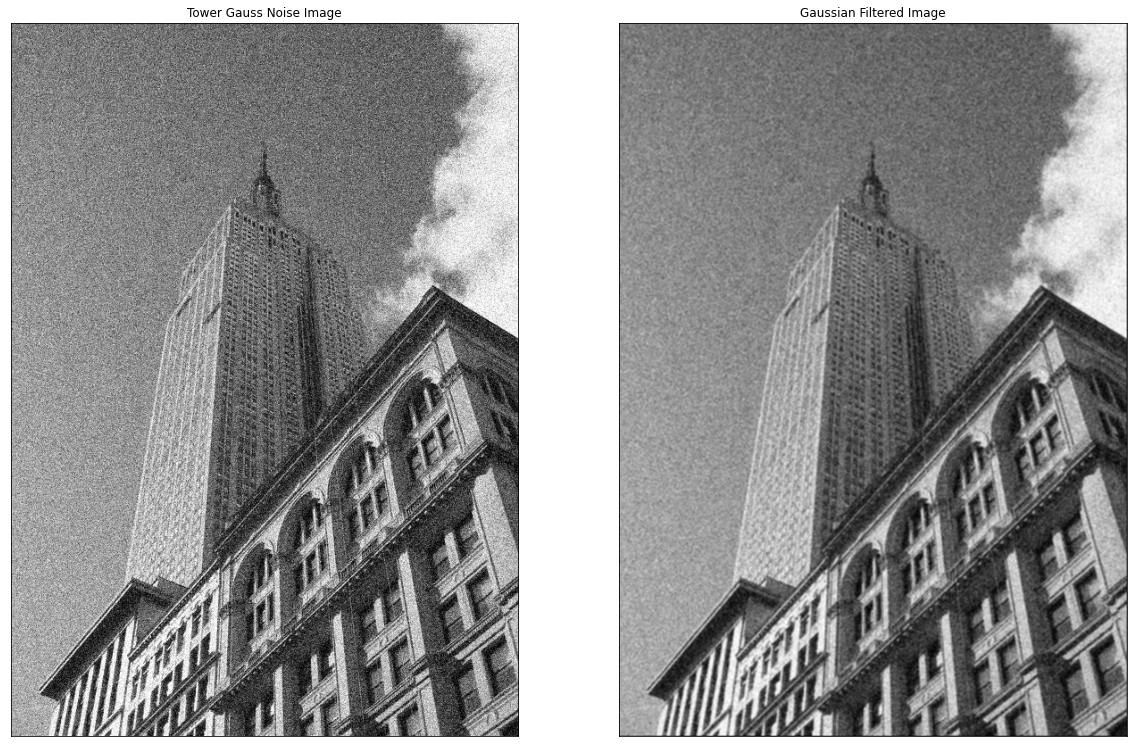

In [62]:
size = 3
variance = 2
sigma = math.sqrt(variance)

def gaussian_kernel(size, sigma):
  # We apply the formula seen in class
  size = int(size) // 2
  x, y = np.mgrid[-size : size + 1, -size : size + 1]
  normal = 1 / (2.0 * np.pi * sigma ** 2)
  g =  np.exp(- ((x ** 2 + y ** 2) / (2.0 * sigma ** 2))) * normal
  g *= 1 / np.sum(g)
  return g

def convolution(input_image, kernel, size):
  output_image = np.zeros_like(input_image)
  
  # Add zero padding to the input image
  pad_size = np.floor(size / 2).astype("uint8")
  pad_input_image = np.pad(input_image, pad_width = int(pad_size), mode = 'constant', constant_values = 0)

  # 2D convolution
  input_x, input_y = input_image.shape
  kernel_x, kernel_y = kernel.shape

  # Convolution arithmetic
  # We create a temporary array, the size of the kernel
  # We will add all the elements surrounding the position wanted, multiplied by the corresponding element of the kernel
  # The sum obtained will be added to the output image in the wanted position
  size = int(size) // 2

  for x in range (input_x):
    for y in range (input_y):
      temp_x = x + 1
      temp_y = y + 1
      temp_array = np.zeros_like(kernel)
      for k_x in range (kernel_x):
        for k_y in range (kernel_y):
          temp_array[k_x, k_y] = pad_input_image[temp_x - size + k_x, temp_y - size + k_y] * kernel[k_x, k_y]
          output_image[x, y] = np.sum(temp_array)  

  return output_image

# Call the gaussian_kernel function and then do a convolution
kernel_gaussian = gaussian_kernel(size, sigma)
gaussian_filtered = convolution(tower_gauss_noise_image, kernel_gaussian, size)

# Plot Gaussian image and Gaussian Filtered image
plot.figure(figsize = (20, 20)) 

plot.subplot(121)
plot.imshow(tower_gauss_noise_image, cmap = 'gray')
plot.title("Tower Gauss Noise Image")
plot.xticks([])
plot.yticks([])

plot.subplot(122)
plot.imshow(gaussian_filtered, cmap = 'gray') 
plot.title("Gaussian Filtered Image")
plot.xticks([])
plot.yticks([])

plot.show

### Question 2.2

<function matplotlib.pyplot.show>

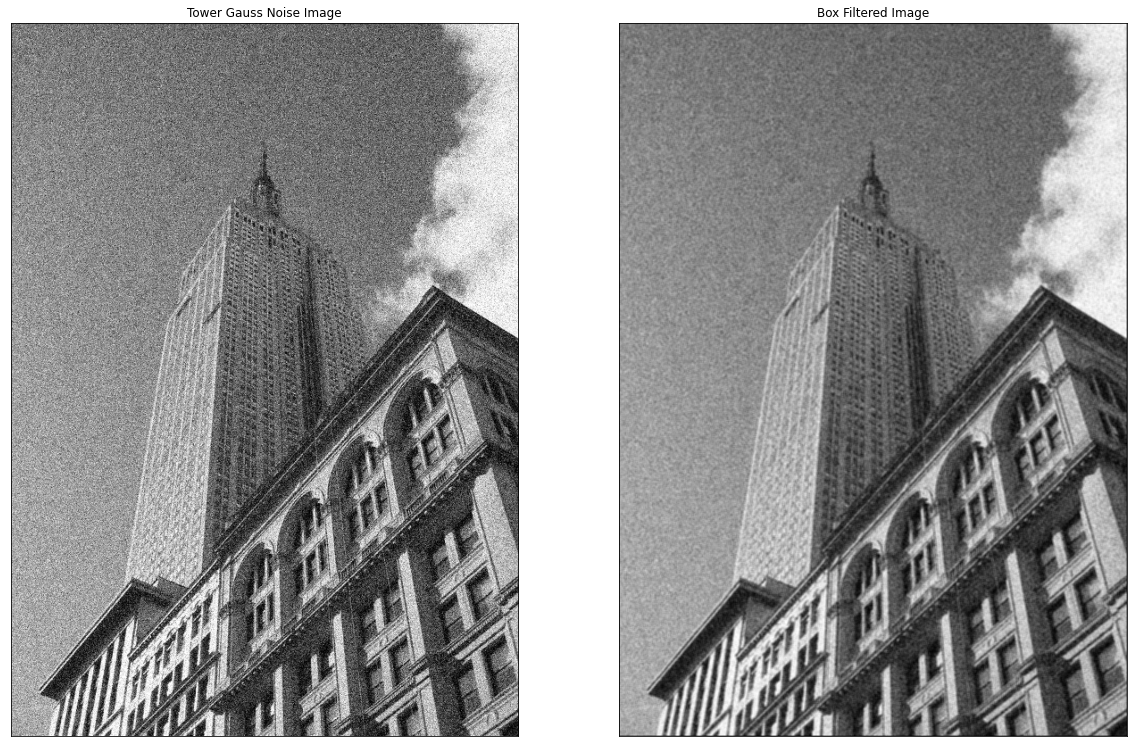

In [63]:
# Generates a box kernel of size 3
def box_kernel(size):
    kernel = np.ones((size, size)) / (size ** 2)
    return kernel

# Call the box kernel function and then do a convolution
kernel_box = box_kernel(size)
box_filtered = convolution(tower_gauss_noise_image, kernel_box, size)

# Plot Gaussian image and Box Filtered image
plot.figure(figsize = (20, 20)) 

plot.subplot(121)
plot.imshow(tower_gauss_noise_image, cmap = 'gray')
plot.title("Tower Gauss Noise Image")
plot.xticks([])
plot.yticks([])

plot.subplot(122)
plot.imshow(box_filtered, cmap = 'gray') 
plot.title("Box Filtered Image")
plot.xticks([])
plot.yticks([])

plot.show

### Question 2.3

In [64]:
# We use the cv2.PSNR() function to compare the noisy image with the filtered ones
gaussian_psnr = cv2.PSNR(tower_image, gaussian_filtered)
box_psnr = cv2.PSNR(tower_image, box_filtered)
print("PSNR of 3x3 and variance = 2 Gaussian filter to Clean image: {}\nPSNR of 3X3 Box filter to Clean image: {}" .format(gaussian_psnr, box_psnr))

PSNR of 3x3 and variance = 2 Gaussian filter to Clean image: 24.84573910989466
PSNR of 3X3 Box filter to Clean image: 24.539892187898502


We can observe that the PSNR values of the gaussian filter and box filter - respectively ~24.8 and ~24.5 -, it can be seen that the PSNR value of the 3x3 gaussian filter gives a superior result. Although the values are not significantly different, it is expected that the gaussian kernel performs better than the box filter. Indeed, theory we know than a gaussian filter filters more of high frequency components from a noisy image.

### Question 2.4

<function matplotlib.pyplot.show>

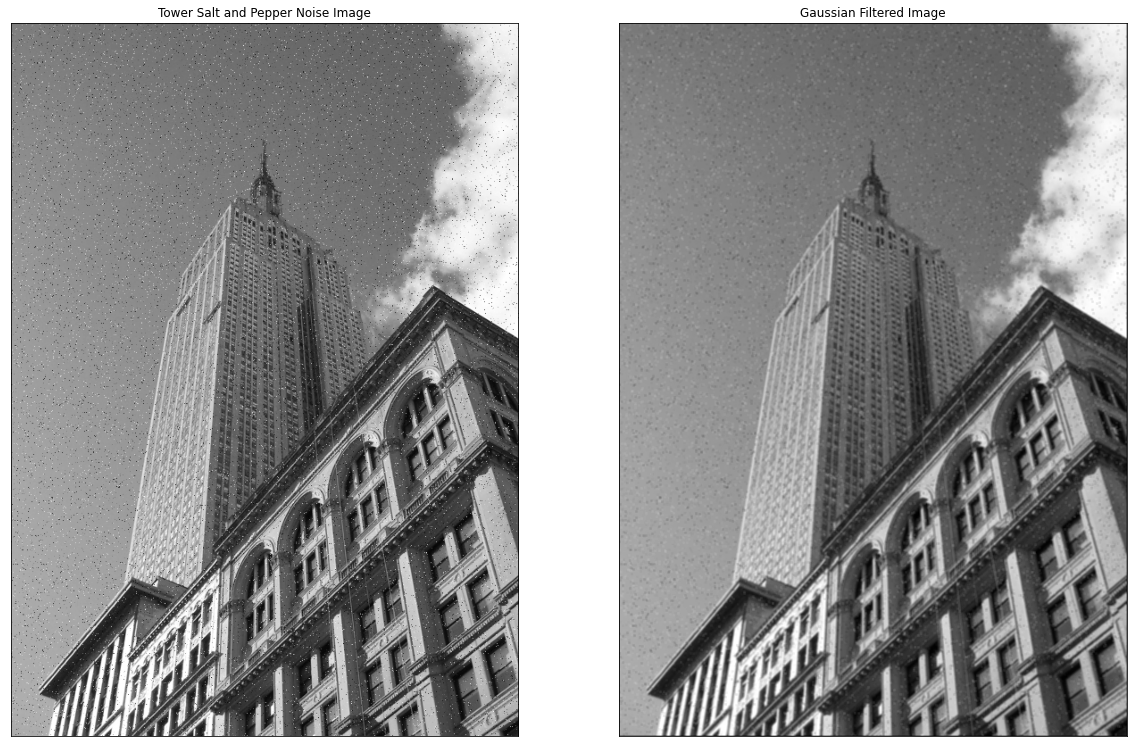

In [65]:
# Call the convolution function, we use the kernel found earlier
gaussian_filtered = convolution(tower_salt_and_pepper_noise_image, kernel_gaussian, size)

# Plot Salt and Pepper image and Gaussian Filtered image
plot.figure(figsize = (20, 20)) 

plot.subplot(121)
plot.imshow(tower_salt_and_pepper_noise_image, cmap = 'gray')
plot.title("Tower Salt and Pepper Noise Image")
plot.xticks([])
plot.yticks([])

plot.subplot(122)
plot.imshow(gaussian_filtered, cmap = 'gray') 
plot.title("Gaussian Filtered Image")
plot.xticks([])
plot.yticks([])

plot.show

### Question 2.5

<function matplotlib.pyplot.show>

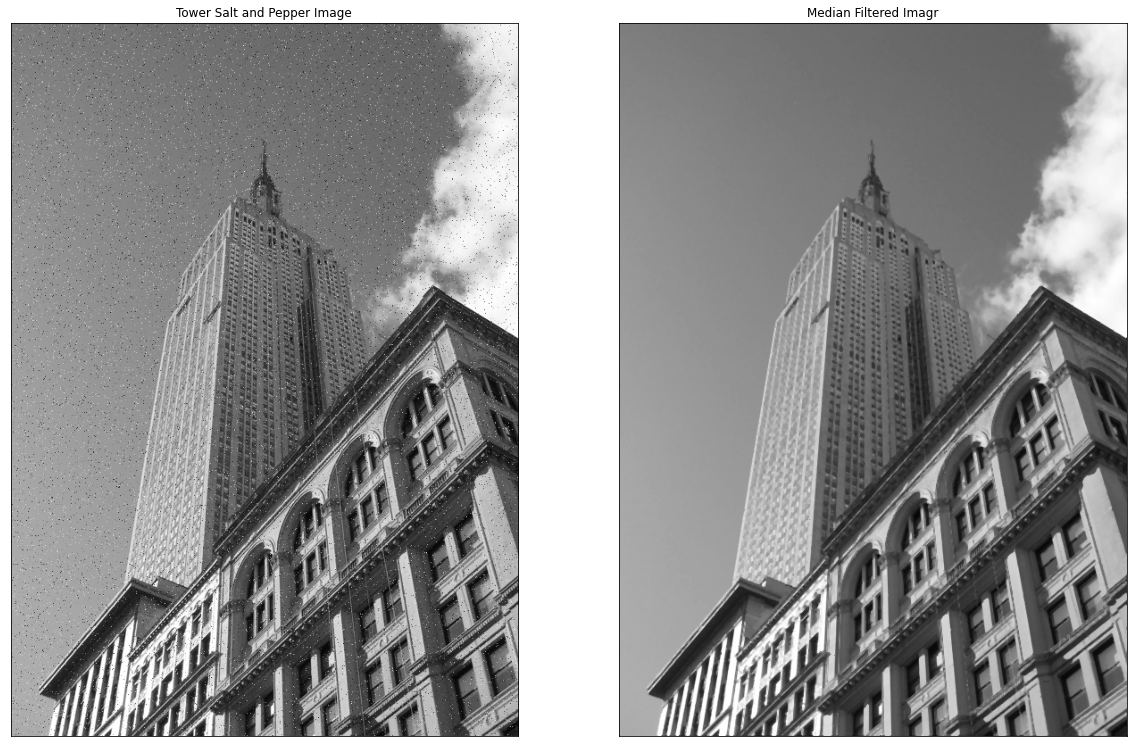

In [66]:
def median_filter(input_image, size):
    # Calculate pad_size
    pad_size = np.floor(size / 2).astype("uint8")
    pad_input_image = np.pad(input_image, pad_width = int(pad_size), mode = 'constant', constant_values = 0)

    # Get Height and Width of the original image
    height, width = pad_input_image.shape

    # Initialize output image to be similar to original image size
    output_image = np.zeros_like(input_image)

    # Now Traverse through image using two for loops
    for i in range(0, height - 2 * pad_size):
        for j in range(0, width - 2 * pad_size):
            output_image[i, j] = np.median(pad_input_image[i : i + size, j : j + size])

    return output_image

# Call the median filter function
median_filtered = median_filter(tower_salt_and_pepper_noise_image, size)

# Plot Salt and Pepper image and Median Filtered image
plot.figure(figsize = (20, 20)) 

plot.subplot(121)
plot.imshow(tower_salt_and_pepper_noise_image, cmap = 'gray') 
plot.title("Tower Salt and Pepper Image")
plot.xticks([])
plot.yticks([])

plot.subplot(122)
plot.imshow(median_filtered, cmap = 'gray') 
plot.title("Median Filtered Imagr")
plot.xticks([])
plot.yticks([])

plot.show

### Question 2.6

In [67]:
# We use the cv2.PSNR() function to compare the noisy image with the filtered ones
gaussian_psnr = cv2.PSNR(tower_image, gaussian_filtered)
median_psnr = cv2.PSNR(tower_image, median_filtered)
print("PSNR of 3x3 and variance = 2 Gaussian filter to Clean image: {}\nPSNR of 3X3 Median filter to Clean image: {}" .format(gaussian_psnr, median_psnr))

PSNR of 3x3 and variance = 2 Gaussian filter to Clean image: 26.37482275430482
PSNR of 3X3 Median filter to Clean image: 28.736052720576456


We can observe that the PSNR values of the gaussian filter and median filter - respectively ~26.4 and ~28.7 -, it can be seen that the PSNR value of the 3x3 median filter gives a superior result. In this case the values are a bit more different than in a previous comparison between gaussian and box filters, it is expected that the median kernel performs better than the box filter. Indeed, salt and pepper noise is multiplicative, therefore it requires non-linear filtering techniques such as median filtering to reduce noise from images effectively. Gaussian filtering is a linear filtering method that is suitable to reduce additive noise.

---
## **3 - Sobel Edge Detector**


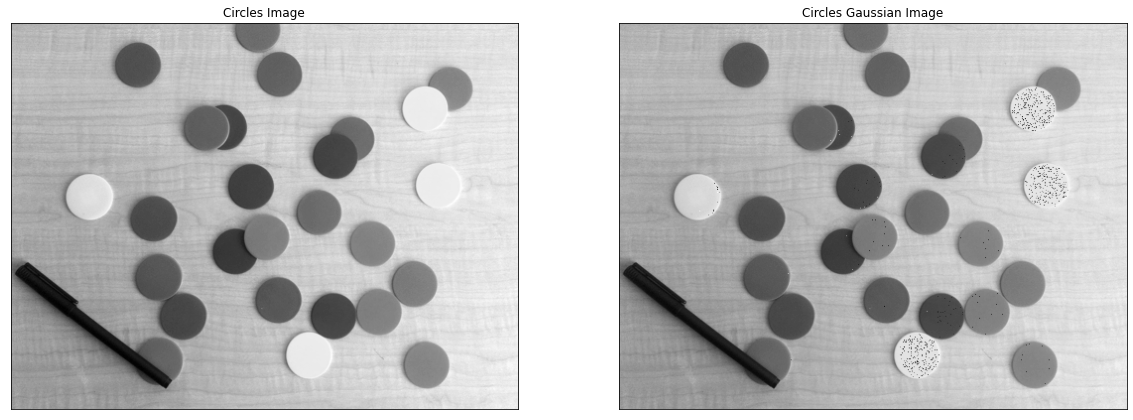

In [68]:
# Initial setup

# Read the 'Circles.png' and 'Circles_gauss.png' images and convert them to grayscale
circles_image = cv2.imread(path + 'Circles.png', cv2.IMREAD_GRAYSCALE)
circles_gauss_image = cv2.imread(path + 'Circles_gauss.png', cv2.IMREAD_GRAYSCALE)

# Plot the 2 images
plot.figure(figsize = (20, 20)) 

plot.subplot(121)
plot.imshow(circles_image, cmap = 'gray')
plot.title("Circles Image")
plot.xticks([])
plot.yticks([])

plot.subplot(122)
plot.imshow(circles_gauss_image, cmap = 'gray')
plot.title("Circles Gaussian Image")
plot.xticks([])
plot.yticks([])

plot.show()

* 3 versions of the Sobel edge detectore with kernel sizes 3x3, 5x5, and 7x7 and Thresholds of 10% and 20% for Circles Image

Sobel edge detector with kernel size of 3x3


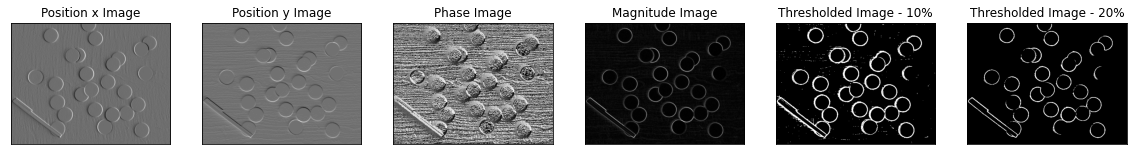

Sobel edge detector with kernel size of 5x5


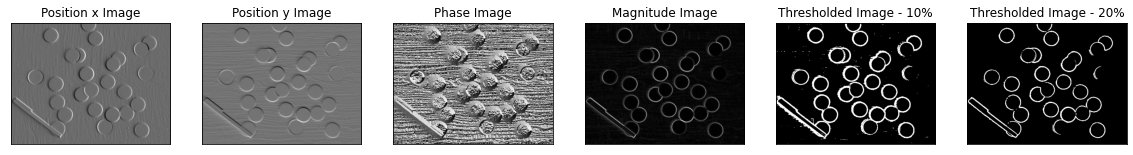

Sobel edge detector with kernel size of 7x7


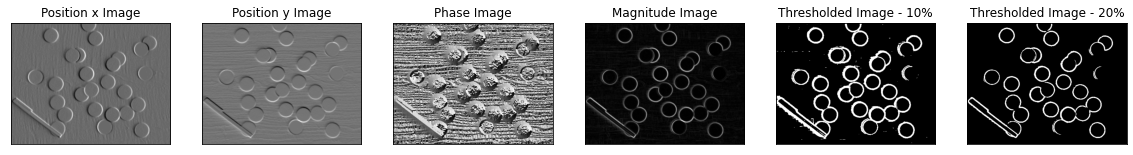

In [69]:
kernels = [3, 5, 7]
threshold_percentages = [10, 20]

def sobel_edge_detector(image, kernel):
  # X and Y positions
  position_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = kernel)
  position_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = kernel)

  # Magnitude and Phase
  magnitude = cv2.magnitude(position_x, position_y)
  phase = cv2.phase(position_x, position_y)

  # Thresholds
  # 10%
  thresholded_circles_image_10 = np.zeros_like(magnitude) 
  thresholded_circles_image_10[magnitude > np.amax(magnitude) * threshold_percentages[0] / 100] = white_pixel
  # 20%
  thresholded_circles_image_20 = np.zeros_like(magnitude) 
  thresholded_circles_image_20[magnitude > np.amax(magnitude) * threshold_percentages[1] / 100] = white_pixel
  

  # Plot Positions x and y, Phase, Magnitude, and Thresholded images
  plot.figure(figsize = (20,20))
  
  plot.subplot(161)
  plot.imshow(position_x, cmap = "gray")
  plot.title("Position x Image")
  plot.xticks([])
  plot.yticks([])

  plot.subplot(162)
  plot.imshow(position_y, cmap = "gray")
  plot.title("Position y Image")
  plot.xticks([])
  plot.yticks([])

  plot.subplot(163)
  plot.imshow(phase, cmap = "gray")
  plot.title("Phase Image")
  plot.xticks([])
  plot.yticks([])

  plot.subplot(164)
  plot.imshow(magnitude, cmap = "gray")
  plot.title("Magnitude Image")
  plot.xticks([])
  plot.yticks([])

  plot.subplot(165)
  plot.imshow(thresholded_circles_image_10, cmap = "gray")
  plot.title("Thresholded Image - 10%")
  plot.xticks([])
  plot.yticks([])

  plot.subplot(166)
  plot.imshow(thresholded_circles_image_20, cmap = "gray")
  plot.title("Thresholded Image - 20%")
  plot.xticks([])
  plot.yticks([])

  plot.show()

# Call Sobel edge detector function with a different kernel size
for kernel in kernels:
  print("Sobel edge detector with kernel size of {}x{}" .format(kernel, kernel))
  sobel_edge_detector(circles_image, kernel)


We can observe in the images above the x and y images after implementing a sobel function, phase, magnitude and, 10%, and 20% thresholded images with different kernel sizes: 3x3, 5x5, and 7x7.

From the results, we can deduce that as the kernel size increases, the detection of the edges is better. If we compare the 3 images with a 20% threshold, the size of the edges is thiner for the 3x3 size kernel and becomes thicker for the 5x5 kernel, and even thicker for the 7x7 kernel. This means that the bigger the kernel size is, the less noise there is. This result can also be observed on the 10% images.

Furthermore, when comparing different thresholding values but with the same kernel size such as a 3x3 kernel size with a 10% threshold, it can be seen that the higher the threshold value is, the less noise there is.

Therefore, the image with the less noise is as expected the image with a 7x7 kernel size and a 20% thershold value.


* Sobel edge detector with a kernel size of 3x3 and 2 thresholds of 10% and 20% - Using the Circles Gaussian Image

Noisy Circles Image and Sobel edge detector with kernel size of 3x3


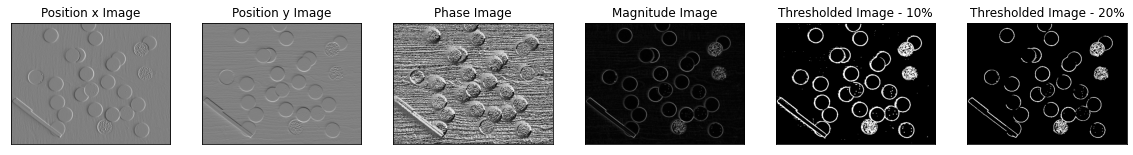

In [70]:
# Call Sobel edge detector function with a different kernel size
print("Noisy Circles Image and Sobel edge detector with kernel size of {}x{}" .format(kernels[0], kernels[0]))
sobel_edge_detector(circles_gauss_image, kernels[0])

* Denoise the Circle Gaussian Image with a 3x3 box filter and apply Sobel edge detector

<function matplotlib.pyplot.show>

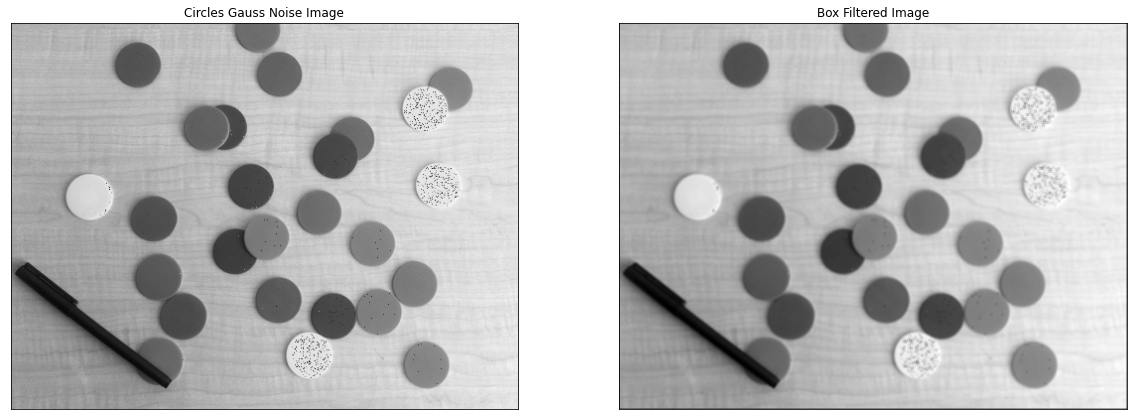

In [71]:
# Using what we did in question 2.2
kernel_box = box_kernel(kernels[0])
box_filtered = convolution(circles_gauss_image, kernel_box, kernels[0])

# Plot Gaussian image and Box Filtered image
plot.figure(figsize = (20, 20)) 

plot.subplot(121)
plot.imshow(circles_gauss_image, cmap = 'gray')
plot.title("Circles Gauss Noise Image")
plot.xticks([])
plot.yticks([])

plot.subplot(122)
plot.imshow(box_filtered, cmap = 'gray') 
plot.title("Box Filtered Image")
plot.xticks([])
plot.yticks([])

plot.show

Denoised Circles Image and Sobel edge detector with kernel size of 3x3


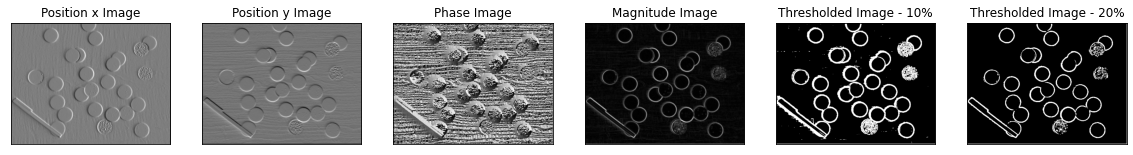

In [72]:
# Call Sobel edge detector function with the denoised image
print("Denoised Circles Image and Sobel edge detector with kernel size of {}x{}" .format(kernels[0], kernels[0]))
sobel_edge_detector(box_filtered, kernels[0])

* Comment on the effectiveness of using denoising prior to edge detection

Comparing the images above where we do denoising before sobel edge detection, and the previous images where we only did sobel edge detection without any denoising, we can observe that denoising a noisy image prior to performing an edge detection produces better results. Indeed, if we focus on the 20% thresholded image above, the edges are more complete and better defined than without denoising. 

Therefore, the denoising process is useful because it hinders the effect of noise. The details of the noise is almost entirely lost as it blurs into the underlying image. In this way, edge detection becomes simpler, as the noise has been filtered down. Using denoising allows to avoid extra noise to affect the edge detection. As explained, especially when the threshold values have a high percentage, the amount of false edges is largely reduced.